In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from stldecompose import decompose

pd.options.display.max_rows = 100
GBQ_PROJECT_ID = 'ebmdatalab'

### Get monthly data

In [2]:
q = '''
SELECT
  month,
  SUM(items) AS items,
  SUM(star_pu_items) AS star_pu_items,
  SUM(items) / (SUM(star_pu_items)/1000) AS items_per_star_pu
FROM (
  SELECT
    p.month,
    SUM(items) AS items,
    CAST(JSON_EXTRACT(MAX(star_pu),
        '$.oral_antibacterials_item') AS FLOAT64) AS star_pu_items
  FROM
    ebmdatalab.hscic.normalised_prescribing_standard p
  LEFT JOIN
    ebmdatalab.hscic.practice_statistics_all_years stat
  ON
    p.practice = stat.practice
    AND p.month = stat.month
  WHERE
    p.month >= '2010-10-01'
    AND bnf_code LIKE '0501%'
  GROUP BY
    p.practice,
    month )
GROUP BY
  month
ORDER BY
  month
'''

totals = pd.read_gbq(q, GBQ_PROJECT_ID, verbose=False, dialect='standard',index_col='month')
totals

,items,star_pu_items,items_per_star_pu
month,,,
2010-10-01,3058208,3.077908e+07,99.359957
2010-11-01,3201713,3.078087e+07,104.016318
2010-12-01,4095170,3.077666e+07,133.060888
2011-01-01,3465222,3.082144e+07,112.428946
2011-02-01,3030377,3.082421e+07,98.311576
2011-03-01,3468823,3.082133e+07,112.546193
2011-04-01,2801389,3.085441e+07,90.793800
2011-05-01,2726241,3.085340e+07,88.361129
2011-06-01,2805170,3.084268e+07,90.950911


In [3]:
totals.to_csv('total_antibiotic_prescribing.csv')

### Smoothing seasonality using LOWESS regression

In [4]:
res = decompose(totals['items_per_star_pu'], period=12, lo_frac=0.6, lo_delta=0.0)
res = res.trend
res

month
2010-10-01    100.997561
2010-11-01    100.954064
2010-12-01    100.909847
2011-01-01    100.864707
2011-02-01    100.818267
2011-03-01    100.769943
2011-04-01    100.719084
2011-05-01    100.664891
2011-06-01    100.606669
2011-07-01    100.543927
2011-08-01    100.476377
2011-09-01    100.403981
2011-10-01    100.326980
2011-11-01    100.245872
2011-12-01    100.161354
2012-01-01    100.074209
2012-02-01     99.985205
2012-03-01     99.895097
2012-04-01     99.804638
2012-05-01     99.714606
2012-06-01     99.626035
2012-07-01     99.540225
2012-08-01     99.459036
2012-09-01     99.385034
2012-10-01     99.321900
2012-11-01     99.274557
2012-12-01     99.247690
2013-01-01     99.241707
2013-02-01     99.145142
2013-03-01     99.042128
2013-04-01     98.924476
2013-05-01     98.783501
2013-06-01     98.612178
2013-07-01     98.404533
2013-08-01     98.159404
2013-09-01     97.879770
2013-10-01     97.571874
2013-11-01     97.245657
2013-12-01     96.911936
2014-01-01     96.5

### Calculate national level antibiotic STAR-PUs for annual data

In [5]:
# import STAR-PU multipliers and population sizes from BigQuery:
q = '''SELECT * 
FROM ebmdatalab.ONS.oral_antibiotics_star_pu'''
q2 = '''SELECT *
FROM ebmdatalab.ONS.england_population_1998_2017 
'''

m = pd.read_gbq(q, GBQ_PROJECT_ID, dialect='standard',verbose=False)
pop = pd.read_gbq(q2, GBQ_PROJECT_ID, dialect='standard',verbose=False).drop(["location","all_ages"],axis=1)

In [6]:
# create age-band groups
m = m.rename(columns={"Age_Band":"age_band"})
m["min_age"] = m["age_band"].str.split('-',expand=True)[0].str.replace("+","").astype(int)
m = m.sort_values(by="min_age") # this sorted table will be used in the next step (1b)

# rearrange data
m2 = pd.DataFrame(m[["age_band","item_male","item_female","cost_male","cost_female"]].set_index("age_band").unstack()).reset_index().sort_values(by="age_band")
m2 = m2.rename(columns={"level_0":"category",0:"multiplier"})

# split gender and items vs cost into separate columns
m2["measure"] = m2["category"].str.split('_',expand=True)[0]
m2["gender"] = m2["category"].str.split('_',expand=True)[1]

# rearrange table
m2 = m2.drop("category",axis=1)
m2 = m2.set_index(["age_band","gender","measure"]).unstack().reset_index(col_level=1)
m2.columns = m2.columns.droplevel()
m2.head()

measure,age_band,gender,cost,item
0,0-4,female,2.8,0.8
1,0-4,male,3.2,0.8
2,15-24,female,2.5,0.6
3,15-24,male,2.1,0.3
4,25-34,female,2.0,0.6


In [7]:
# rearrange population data:
p2 = pd.DataFrame(pop.set_index(["year","gender"]).stack()).reset_index()
p2["gender"] = p2.gender.str.lower()
p2 = p2.rename(columns={"level_2":"_age",0:"population"})
p2["age"] = p2["_age"].str.replace("_","").astype(int)

# Group into age bands
conditions = [
    (p2['age']<5 ),
    (p2['age']<15 ),
    (p2['age']<25 ),
    (p2['age']<35 ),
    (p2['age']<45 ),
    (p2['age']<55 ),
    (p2['age']<65 ),
    (p2['age']<75 ),
    (p2['age']>=75)]
choices = m["age_band"].drop_duplicates().values # assign each age to an age band from the table formed above
p2['age_band'] = np.select(conditions, choices)

p3 = pd.DataFrame(p2.groupby(["year","age_band","gender"])["population"].sum()).reset_index()
# join to STAR-PU multipliers:
p3 = p3.merge(m2,on=["age_band","gender"])
p3["item_star-pu"] = p3.population*p3.item
p3["cost_star-pu"] = p3.population*p3.cost
starpu = pd.DataFrame(p3.groupby(["year"])["item_star-pu","cost_star-pu"].sum()).reset_index()
starpu

,year,item_star-pu,cost_star-pu
0,1998,26914610.0,111491490.0
1,1999,27018730.0,111926740.0
2,2000,27127640.0,112364760.0
3,2001,27249436.5,112905819.5
4,2002,27392281.2,113551221.2
5,2003,27547207.4,114240730.8
6,2004,27715678.5,114968844.1
7,2005,27956819.3,115953712.4
8,2006,28178088.7,116859606.9
9,2007,28446408.2,117958881.2


### Get annual data

In [8]:
q = """
SELECT
  year,
  SUM(items) AS items
FROM
  ebmdatalab.helen.trends_from_pca_final_2017 p
WHERE
  chapter_code_current = '05'
  AND section_code_current = '01'
GROUP BY
  year
ORDER BY
  year
"""

prescribing = pd.read_gbq(q, GBQ_PROJECT_ID, dialect='standard',verbose=False)

In [9]:
prescribing['items_per_star-pu'] = prescribing['items'] / (starpu['item_star-pu']/1000)
prescribing

,year,items,items_per_star-pu
0,1998,42615600.0,1583.363088
1,1999,38637200.0,1430.015400
2,2000,36875908.1,1359.348181
3,2001,37914029.0,1391.369286
4,2002,36948880.0,1348.879260
5,2003,37597529.0,1364.839944
6,2004,36463038.0,1315.610513
7,2005,37240737.0,1332.080613
8,2006,37175639.0,1319.310170
9,2007,39175949.0,1377.184379


In [10]:
prescribing.to_csv('pca_totals.csv')

### Run Stata do file

In [11]:
## Define a Python function to launch a do-file 
def dostata(dofile, *params):
    ## Launch a do-file that is in the same folder as this notebook
    ## can also pass a list of parameters.
    import subprocess    
    cmd = ["C:\Program Files (x86)\Stata13\StataSE-64.exe", "do", dofile]
    for param in params:
        cmd.append(param)
    return subprocess.call(cmd,shell = 'true') 

## Run a do-file
dostata("antibiotics_itsa.do")

0

### ITSA results

In [12]:
itsa_long_term = pd.read_csv('itsa_long_term.txt', sep='\t',header = 2,index_col='VARIABLES').dropna()
itsa_long_term

,coef,ci
VARIABLES,,
_t,-4.9521,-16.9799 - 7.0758
_x2013,50.6101,-42.1891 - 143.4094
_x_t2013,-46.3521,-61.3810 - -31.3231
Constant,"1,420.1426","1,303.1381 - 1,537.1471"


In [13]:
itsa_monthly = pd.read_csv('itsa_monthly.txt', sep='\t',header = 2,index_col='VARIABLES').dropna()
itsa_monthly

,coef,ci
VARIABLES,,
2.date2,-10.7471,-14.9417 - -6.5524
3.date2,-4.7780,-9.2791 - -0.2769
4.date2,-17.5648,-22.1884 - -12.9413
5.date2,-18.4213,-23.5970 - -13.2457
6.date2,-22.0674,-26.0224 - -18.1125
7.date2,-20.2723,-24.8863 - -15.6582
8.date2,-26.8041,-31.4941 - -22.1141
9.date2,-22.3110,-26.3960 - -18.2260
10.date2,-12.7210,-16.9039 - -8.5380


In [14]:
pred_long_term = pd.read_csv('pred_long_term.csv',index_col = 'year',parse_dates = ['year'])
pred_monthly = pd.read_csv('pred_monthly.csv',index_col = 'month',parse_dates = ['month'])

In [15]:
dates = pd.to_datetime(prescribing.year,format='%Y') #+ pd.DateOffset(months=6)
prescribing = prescribing.set_index(dates)

### Modelling number of prescriptions prevented

In [16]:
forecast_monthly = pd.DataFrame(index = pred_monthly.index)
forecast_monthly['month_of_yr'] = pred_monthly.index.month
itsa_monthly['month'] = itsa_monthly.index.str.split('.').str[0]
itsa_monthly['month'] = pd.to_numeric(itsa_monthly['month'],errors='coerce')
forecast_monthly = forecast_monthly.merge(itsa_monthly[['month','coef']], how = 'left', left_on = 'month_of_yr', right_on='month')
forecast_monthly = forecast_monthly.fillna(0)
forecast_monthly = (itsa_monthly.iloc[11]['coef'] * forecast_monthly.index) + itsa_monthly.iloc[14]['coef'] + forecast_monthly['coef']
forecast_monthly.index = pred_monthly.index
forecast_monthly

month
2010-10-01    100.4972
2010-11-01    102.1296
2010-12-01    117.6838
2011-01-01    113.4234
2011-02-01    102.7447
2011-03-01    108.7822
2011-04-01     96.0638
2011-05-01     95.2757
2011-06-01     91.6980
2011-07-01     93.5615
2011-08-01     87.0981
2011-09-01     91.6596
2011-10-01    101.3180
2011-11-01    102.9504
2011-12-01    118.5046
2012-01-01    114.2442
2012-02-01    103.5655
2012-03-01    109.6030
2012-04-01     96.8846
2012-05-01     96.0965
2012-06-01     92.5188
2012-07-01     94.3823
2012-08-01     87.9189
2012-09-01     92.4804
2012-10-01    102.1388
2012-11-01    103.7712
2012-12-01    119.3254
2013-01-01    115.0650
2013-02-01    104.3863
2013-03-01    110.4238
2013-04-01     97.7054
2013-05-01     96.9173
2013-06-01     93.3396
2013-07-01     95.2031
2013-08-01     88.7397
2013-09-01     93.3012
2013-10-01    102.9596
2013-11-01    104.5920
2013-12-01    120.1462
2014-01-01    115.8858
2014-02-01    105.2071
2014-03-01    111.2446
2014-04-01     98.5262
2014-

In [17]:
forecast_monthly_n = forecast_monthly * (totals['star_pu_items']/1000)
forecast_monthly_n.loc[forecast_monthly_n.index>='2017-05-01'].sum()

48396690.55294104

In [18]:
totals['items'].loc[totals.index>='2017-05-01'].sum()

38703130

In [19]:
obs_exp = totals['items'] - forecast_monthly_n
obs_exp.loc[obs_exp.index>='2017-05-01'].sum()

-9693560.55294104

### Draw Graph

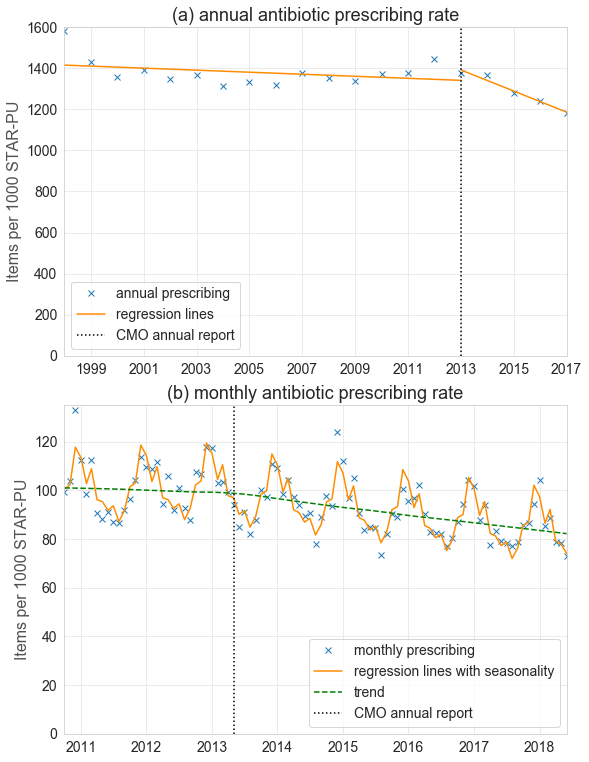

In [20]:
sns.set_style("whitegrid",{'grid.color': '.9'})

fig = plt.figure(figsize=(9,13))
gs = gridspec.GridSpec(2,1)  # grid layout for subplots

ax = plt.subplot(gs[0,0])
ax.plot(prescribing['items_per_star-pu'],'x',label='annual prescribing')
before = pred_long_term.copy().loc[pred_long_term.index<='2013-01-01']
before['2013'] = float(before['2012']['_s_items_per_starpu_pred']) + float(itsa_long_term.iloc[0]['coef'])
ax.plot(before,label='regression lines',color='darkorange')
after = pred_long_term.loc[pred_long_term.index>='2013-01-01']
ax.plot(after,color='darkorange')

ax.axvline(color='k',linestyle=':',x='2013-01-01',label='CMO annual report')

ax.set_ylabel('Items per 1000 STAR-PU', size =16, alpha=0.8)
ax.set_title('(a) annual antibiotic prescribing rate',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim(['1998-01-01','2017-01-01']) # set x axis range as full date range
ax.set_ylim([0,1600])
ax.legend(prop={'size': 14})

############
ax = plt.subplot(gs[1,0])
ax.plot(totals['items_per_star_pu'],'x',label='monthly prescribing')
ax.plot(pred_monthly,label='regression lines with seasonality',color='darkorange')
#ax.plot(forecast_monthly, label='initial trend extrapolated', linestyle=(0, (1, 3)),color='darkorange')
ax.plot(res,'--',label='trend', color='g')

ax.axvline(color='k',linestyle=':',x='2013-05-01',label='CMO annual report')

ax.set_ylabel('Items per 1000 STAR-PU', size =16, alpha=0.8)
ax.set_title('(b) monthly antibiotic prescribing rate',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim(['2010-10-01','2018-06-01']) # set x axis range as full date range
ax.set_ylim([0,135])
ax.legend(prop={'size': 14})

plt.subplots_adjust(wspace = 0.12,hspace = 0.15)

plt.savefig('ITSA_graph.png', format='png', dpi=300,bbox_inches='tight')
plt.show()